# Исследование надежности заемщиков

## Общая информация
  
### Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Описание данных

   * children — количество детей в семье
   * days_employed — общий трудовой стаж в днях
   * dob_years — возраст клиента в годах
   * education — уровень образования клиента
   * education_id — идентификатор уровня образования
   * family_status — семейное положение
   * family_status_id — идентификатор семейного положения
   * gender — пол клиента
   * income_type — тип занятости
   * debt — имел ли задолженность по возврату кредитов
   * total_income — ежемесячный доход
   * purpose — цель получения кредита
    
### План работ
    
   * Общее знакомство с данными
   * #### Предобработка данных
       * удаление пропусков
       * Обработка аномальных значений
       * Изменение типов данных
       * Обработка дубликатов
       * Категоризация данных
   * #### Исследовательская часть
       * Есть ли зависимость между количеством детей и возвратом кредита в срок?
       * Есть ли зависимость между семейным положением и возвратом кредита в срок?
       * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
       * Как разные цели кредита влияют на его возврат в срок?
   * #### Выводы

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Задание 3. Выведите основную информацию о датафрейме с помощью метода info().

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

**Статистические данные по количеству должников и общего количества заявок на кредит,        в зависимости от количества детей:**

children,0,1,2,3,4,5
debt,,,,,,
debtors,1063,444,194,27,4,0
loan_applications,14091,4808,2052,330,41,9


* "debtors" - количество людей, просрочивших платеж

* "loan_applications" - общее количество заявок на кредит в категории

**Доля клиентов, допустивших просрочку выплаты, в зависимости от количества детей:**

children,0,1,2,3,4,5
debt,,,,,,
part,7.54%,9.23%,9.45%,8.18%,9.76%,0.00%
deviation_from_the_average,-0.58%,1.11%,1.33%,0.06%,1.64%,-8.12%


* "part" - доля людей, просрочивших платеж

* "deviation_from_the_average" - отклонение категории от среднего по всей выборке

**Графическое представление:**

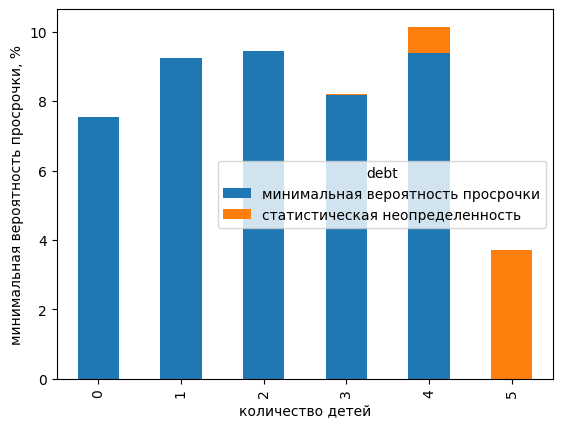

In [23]:
def add_metric_v2(df):
    '''
    Добавление столбцов, которые нужны для анализа. На входе сводная таблица в формате DataFrame. Предпологается
    наличие столбцов со статистикой по пунктуальным заемщикам (индекс 0), и просрочившим платеж (индекс 1).
    На выходе такая же таблица, но с дополнительными столбцами.
    '''
    df = df.rename(columns={1: 'debtors'}) # переименуем столбец в 'должники'
    # Всего заявок на кредит
    df.loc[:, 'loan_applications'] = (df[0] + df['debtors'])
    # Статистическая ошибка от количества заявок
    df.loc[:, 'error'] = (df['loan_applications'] ** (0.5))
    # доля должников
    df.loc[:, 'part'] = df['debtors'] / df['loan_applications']
    # статистическая ошибка доли
    df.loc[:, 'delta_part'] = df['error'] / (df['loan_applications'] ** 2)
    # минимальная вероятность просрочки
    df.loc[:, 'min_rate'] = (df['part'] - df['delta_part']).apply(lambda x: 0 if x<0 else x)
    # максимальная вероятность просрочки
    df.loc[:, 'max_rate'] = df['part']+df['delta_part']
    # Статистическая неопределенность
    df.loc[:, 'stat_error'] = df['max_rate'] - df['min_rate']
    # Столбцы, для вывода в гистаграмме
    df.loc[:, 'минимальная вероятность просрочки'] = 100* df.loc[:, 'min_rate']
    df.loc[:, 'статистическая неопределенность'] = 100 * df.loc[:, 'stat_error']
#    # относительное отклонение категории от общего среднего
    average = df['debtors'].sum() / df['loan_applications'].sum()
    df.loc[:, 'deviation_from_the_average'] = (df['part'] - average)
    return df

def create_pivot_table_v2(row, description_in_string, description_in_hystogram):
    '''
    По сути, все 4 задачи-исследования однотипны. Получить сводную таблицу, вывести статистику, показать доли
    по категориям. Поэтому имеет смысл сделать функцию - шаблон.
    На входе:
        row                        столбец, в датафрейме data, по которому строится сводная таблица
        description_in_string      описание, добавляемое перед выводом таблиц
        description_in_hystogram - описание по оси Х в гистограмме.
    '''
    # создаем сводную таблицу
    pivot_table = data.pivot_table(index=['debt'], columns=row, values='income_type', aggfunc='count')\
        .fillna(0).T.astype('int')
    # добавляем нужные метрики
    pivot_table = add_metric_v2(pivot_table)
    # выводим статистику
    display(Markdown('**Статистические данные по количеству должников и общего количества заявок на кредит,\
        в зависимости от ' + description_in_string + ':**'))
    display(pivot_table.loc[:,['debtors','loan_applications']].T)
    display(Markdown('* "debtors" - количество людей, просрочивших платеж'))
    display(Markdown('* "loan_applications" - общее количество заявок на кредит в категории'))
    # выводим доли.
    display(Markdown('**Доля клиентов, допустивших просрочку выплаты, в зависимости от '+\
        description_in_string + ':**'))
    #display(pivot_table.loc[:,['part','deviation_from_the_average']].T.applymap('{:.2%}'.format))
    display(pivot_table.loc[:,['part','deviation_from_the_average']].T.map('{:.2%}'.format))
    display(Markdown('* "part" - доля людей, просрочивших платеж'))
    display(Markdown('* "deviation_from_the_average" - отклонение категории от среднего по всей выборке'))    
    # выводим гистограмму
    display(Markdown('**Графическое представление:**'))
    pivot_table.loc[:,['минимальная вероятность просрочки','статистическая неопределенность']].plot(
        kind="bar",
        stacked= True,
        xlabel=description_in_hystogram,
        ylabel='минимальная вероятность просрочки, %')
    plt.show()
    # возвращаем таблицу, если вдруг понадобится дальнейшая обработка
    return pivot_table
children = create_pivot_table_v2('children', 'количества детей', 'количество детей')


**Вывод:** 
* Явной зависимости между количеством просроченых кредитов и количеством детей не наблюдается. С учетом статистической ошибки доля заемщиков, просрочивших платеж, отличается от среднего по всей выборке не более чем на 17%. Тем ни менее, бездетные люди и люди с 3 детьми чаще вовремя платят по кредитам.
* Для клиентов с 5 детьми, из-за малой статистики статистическая ошибка сопоставима с усредненной вероятностью просрочки по другим клиентам. <sub>При текущем объеме статистики эту группу можно не учитывать.</sub>

А вот теперь, при исправленной статистической погрешности, видно, что группа с 5-ю детьми ведет себя явно иначе, чем все остальные. Да, группа минимальна, и ей можно пренебречь, но это повод посмотреть на ее представителей:

In [24]:
data[data.children == 5]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
3979,5,1572.328285,42,среднее,1,гражданский брак,1,M,сотрудник,0,142594,на покупку своего автомобиля,C,операции с автомобилем
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460,операции с недвижимостью,C,операции с недвижимостью
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772,операции с жильем,D,операции с недвижимостью
15822,5,418.199982,31,среднее,1,женат / замужем,0,F,сотрудник,0,77552,сделка с подержанным автомобилем,C,операции с автомобилем
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698,покупка недвижимости,B,операции с недвижимостью
16211,5,387.317579,35,среднее,1,гражданский брак,1,F,госслужащий,0,126102,на проведение свадьбы,C,проведение свадьбы
20452,5,268.425464,38,начальное,3,женат / замужем,0,F,сотрудник,0,212545,заняться высшим образованием,B,получение образования
20837,5,2386.600221,35,среднее,1,женат / замужем,0,F,компаньон,0,204241,жилье,B,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068,операции со своей недвижимостью,B,операции с недвижимостью


Забавная группа...
    
* Дама, имеющая начальное образование, доход 200к+ и берущая кредит сразу на высшее образование, минуя среднее. Это как? Муж не хочет оплачивать ее образование? Причем учиться хочет именно она, а не ее дети.

* Еще одна дама, с доходом меньше 50к, берущая кредит на квартиру. В совокупности с 5-ю детьми такой доход - показатель бедности, если не нищеты.

Почти неверняка, что как минимум эти представилели допустят просрочки по выплатам. Это просто вопрос времени.
    
И да, если в итоге статистическая погрешность доли $\Delta_{part} = \left(\frac{\sqrt n}{n^2}\right) = n^{-1.5}$, то для заданной наперед погрешности можно узнать минимальное количество людей в выборке. $n = \left(\Delta_{part}\right)^{-2/3}$. Т.е. для погрешности  меньше 0,1% количество людей в выборке должно быть больше или равно 100.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Статистические данные по количеству должников и общего количества заявок на кредит, в зависимости семейного положения:

**Статистические данные по количеству должников и общего количества заявок на кредит,        в зависимости от семейного положения:**

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
debt,,,,,
debtors,273,84,63,385,927
loan_applications,2796,1189,951,4134,12261


* "debtors" - количество людей, просрочивших платеж

* "loan_applications" - общее количество заявок на кредит в категории

**Доля клиентов, допустивших просрочку выплаты, в зависимости от семейного положения:**

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
debt,,,,,
part,9.76%,7.06%,6.62%,9.31%,7.56%
deviation_from_the_average,1.64%,-1.05%,-1.50%,1.19%,-0.56%


* "part" - доля людей, просрочивших платеж

* "deviation_from_the_average" - отклонение категории от среднего по всей выборке

**Графическое представление:**

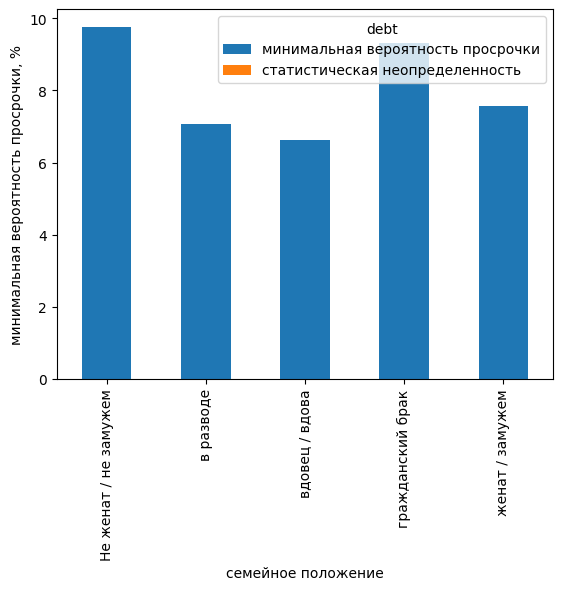

In [25]:
family_status = create_pivot_table_v2('family_status', 'семейного положения', 'семейное положение')

**Вывод:** 
* Люди, не скреплявшие себя официальными отношениями, чаще не допускали просрочку выплаты (приблизительно на 1,5% чаще, по сравнению со средним значением).
* Напротив, люди, утратившие официальные отношения, реже допускали просрочки выплат (приблизительно на один процент, по сравнению со средним значением).

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Категории клиентов, в зависимости от уровня дохода:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Статистические данные по количеству должников и общего количества заявок на кредит,        в зависимости от категории уровня дохода:**

total_income_category,B,C,D
debt,,,
debtors,354,1353,21
loan_applications,5014,15921,349


* "debtors" - количество людей, просрочивших платеж

* "loan_applications" - общее количество заявок на кредит в категории

**Доля клиентов, допустивших просрочку выплаты, в зависимости от категории уровня дохода:**

total_income_category,B,C,D
debt,,,
part,7.06%,8.50%,6.02%
deviation_from_the_average,-1.06%,0.38%,-2.10%


* "part" - доля людей, просрочивших платеж

* "deviation_from_the_average" - отклонение категории от среднего по всей выборке

**Графическое представление:**

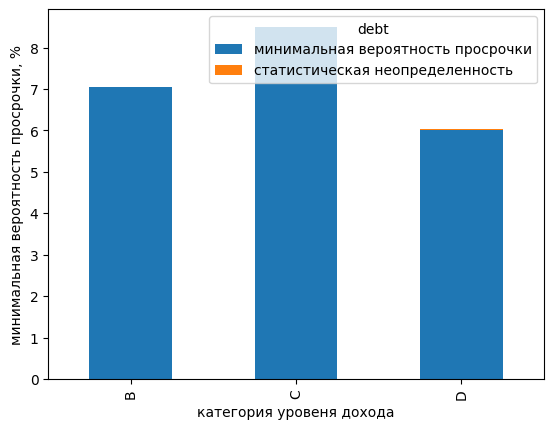

In [26]:
def create_pivot_table_v2_2(row, description_in_string, description_in_hystogram):

# Надо было создавать функцию, с передачей датафрейма в качестве аргумента. Теперь приходится дополнительную
# функцию создавать, для исключения нескольких категорий
    data4 = data[data.total_income_category.apply(lambda x: x in ['B','C','D'])]
    
    pivot_table = data4.pivot_table(index=['debt'], columns=row, values='income_type', aggfunc='count')\
        .fillna(0).T.astype('int')
    pivot_table = add_metric_v2(pivot_table)
    display(Markdown('**Статистические данные по количеству должников и общего количества заявок на кредит,\
        в зависимости от ' + description_in_string + ':**'))
    display(pivot_table.loc[:,['debtors','loan_applications']].T)
    display(Markdown('* "debtors" - количество людей, просрочивших платеж'))
    display(Markdown('* "loan_applications" - общее количество заявок на кредит в категории'))
    display(Markdown('**Доля клиентов, допустивших просрочку выплаты, в зависимости от '+\
        description_in_string + ':**'))
    #display(pivot_table.loc[:,['part','deviation_from_the_average']].T.applymap('{:.2%}'.format))
    display(pivot_table.loc[:,['part','deviation_from_the_average']].T.map('{:.2%}'.format))
    display(Markdown('* "part" - доля людей, просрочивших платеж'))
    display(Markdown('* "deviation_from_the_average" - отклонение категории от среднего по всей выборке'))    
    display(Markdown('**Графическое представление:**'))
    pivot_table.loc[:,['минимальная вероятность просрочки','статистическая неопределенность']].plot(
        kind="bar",
        stacked= True,
        xlabel=description_in_hystogram,
        ylabel='минимальная вероятность просрочки, %')
    plt.show()
    return pivot_table

total_income_category = create_pivot_table_v2_2('total_income_category', 'категории уровня дохода', 'категория уровеня дохода')

**Вывод:** 
* Люди, с доходом от 30001 до 50000 у.е. (группа D) чуть реже других допускают просрочку платежей ( ~  на 2% реже сравнению с общим уровнем).
* Люди, с доходом от 200001 до 1000000 у.е. (группа B) также чуть реже других допускают просрочку платежей ( ~  на 1% реже сравнению с общим уровнем).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Статистические данные по количеству должников и общего количества заявок на кредит,        в зависимости от целей кредита:**

purpose_category,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
debt,,,,
debtors,400,780,369,183
loan_applications,4279,10751,3988,2313


* "debtors" - количество людей, просрочивших платеж

* "loan_applications" - общее количество заявок на кредит в категории

**Доля клиентов, допустивших просрочку выплаты, в зависимости от целей кредита:**

purpose_category,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
debt,,,,
part,9.35%,7.26%,9.25%,7.91%
deviation_from_the_average,1.23%,-0.86%,1.13%,-0.21%


* "part" - доля людей, просрочивших платеж

* "deviation_from_the_average" - отклонение категории от среднего по всей выборке

**Графическое представление:**

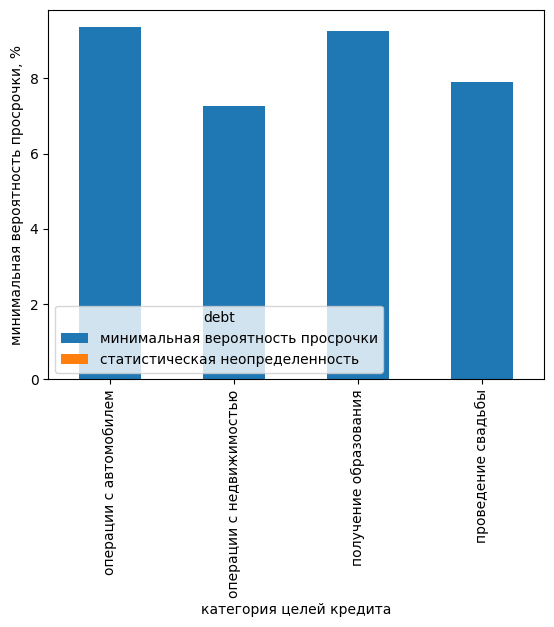

In [27]:
purpose_category = create_pivot_table_v2('purpose_category', 'целей кредита', 'категория целей кредита')

**Вывод:** 
* Люди, берущие кредит на операции с автомобилем и на получения образования, чаще других допускают просрочку выплаты (~ на 1,2% больше, по сравнению с общим уровнем).
* Чаще всего вовремя выплачиваются выплаты по кредитам, связанных с операциями с недвижимостью (~ на 0,9% больше, по сравнению с общим уровнем).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Изначально в данных присутствовали пропуски в полях с доходом и трудовым стажем. Пропуски только в этих полях позволяют предположить, что это влияние человеческого фактора. Эти данные могли либо изначально не указывать, либо не смогли подтвердить. Доход сложно подтвердить, если человек получал черную зарплату. Также и стаж - работодатель мог официально не оформлять человека на работу. Плюс режим налогооблажения для самозанятых стал доступен позже, чем была снята статистика, поэтому люди, которые работали на себя, не могли это никак подтвердить.  
Причиной пропусков могут быть результаты технического сбоя, вмешательство службы безопасности (не знаю, относить ли это к человеческому фактору, или к системному). Также пропуски в данных могут появиться при объединении данных, полученных из разных источников (в каком-то из источников просто нет этих данных).

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Ответ: При таком заполнении пропусков не должна сильно нарушаться уже имеющаяся статистика (выбор именно медианного значения в качестве заполнителя обусловлен тем, что "обновленные" данные не попадут однозначно ни в одну из категорий при делении выборки пополам, а соответственно не должны сильно исказить картину). В то же время новые данные могут содержать какую-то ценную информацию, из которой можно извлечь какие-либо закономерности.



In [28]:
# Статистика по категориям
pivot_table = data.pivot_table(index=['income_type'], values=['total_income'],aggfunc=['count','min','max','mean','median'])
print(pivot_table)

                       count          min          max           mean  \
                total_income total_income total_income   total_income   
income_type                                                             
безработный                2        59956       202722  131339.000000   
в декрете                  1        53829        53829   53829.000000   
госслужащий             1451        29200       910451  168728.454859   
компаньон               5047        28702      2265604  199608.615811   
пенсионер               3812        20667       735103  135320.753673   
предприниматель            2       499163       499163  499163.000000   
сотрудник              11015        21367      1726276  159547.951975   
студент                    1        98201        98201   98201.000000   

                      median  
                total_income  
income_type                   
безработный         131339.0  
в декрете            53829.0  
госслужащий         150447.0  
компаньон 

Посмотрим распределение по количеству людей по разным актуальным категориям столбца total_income

/home/padla/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


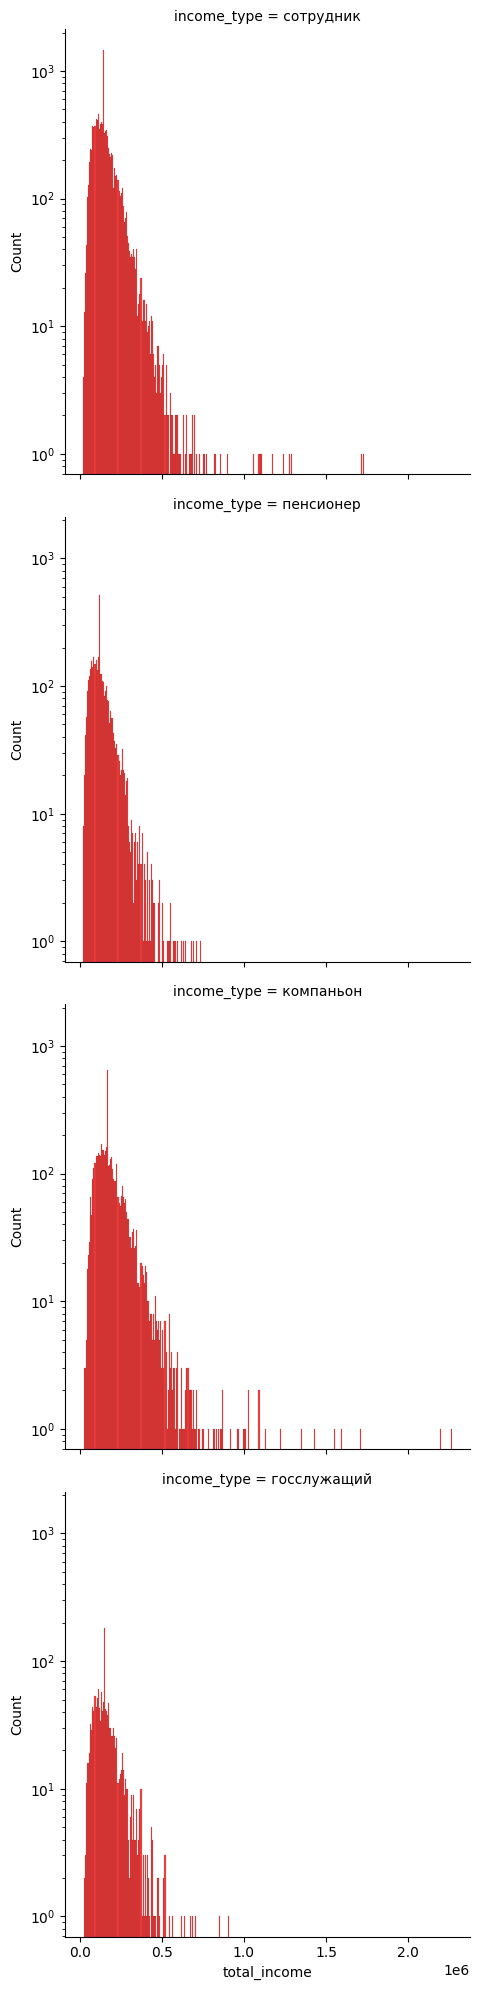

In [29]:
actual_category=list(pivot_table[pivot_table[('count','total_income')] > 2].index)
data3=data[data['income_type'].apply(lambda x: x in actual_category)]
# построим гистограммы для этих категорий
sns.displot(data=data3, x='total_income', row='income_type', kde=False, color='red')
plt.yscale('log')
plt.show()

**По этому датафрейму:**
На всех 4 гистограммах присутствуют люди, со значительно  большими доходами, чем у остальных. Наличие таких людей довольно существенно сдвигает средний доход в сторону увеличения. Иными словами, одно только добавление к категории миллиардера позволит довольно существенно поднять средний доход в категории, в то время как медианный доход, отражающая реальное полложение большинства, не изменится.

Подобные выбросы не являются для этой задачи особо ценной информацией. Они бы были ценны, если бы нас интересовала площадь графика, а не центр тяжести (например, если бы это была гистограмма распределения количества определенного товара в магазинах от его цены, а у нас была бы задача выкупить их все и прогнозировать дальнейшие закупки).

**По вопросу:**
Выбор медианного медианы предпочтительней среднего, если нас интересует центр тяжести распределения. Если нам более интересна площадь - лучше воспорльзоваться средним значением.
    


### Общие выводы
   * #### Была проведена предобработка данных
       * Были удалены 2174 пропусков в столбце с совокупным доходом. Пропуски были заполненны медианными значениями по соответствующему типу занятости. Медианные значения были выбраны потому, что они исключают влияние выбросов, далеко отстоящих от основной массы. Аналогично были заполнены пропуски в столбце с общим трудовым стажем.
       * Были обработаны аномальные значения в столбцах "количество детей" (удалены строки с отрицательным количеством детей, и когда количество детей равно 20) и "общий трудовой стаж" (отрицательные значения были исправлены на положительные). В то же время третий тип пола не был исправлен, т.к. в данном исследовании влияние пола не рассматривалось.
       * Была удалена 71 дублирующаяся запись.
       * Категоризация данных:
        
         клиенты были разбиты на категории по уровню дохода:
        * 0–30000 — 'E';
        * 30001–50000 — 'D';
        * 50001–200000 — 'C';
        * 200001–1000000 — 'B';
        * 1000001 и выше — 'A'.
        
         Также цели кредита были разбиты по категориям:
        * операции с автомобилем;
        * операции с недвижимостью;
        * проведение свадьбы;
        * получение образования.


   * #### Результаты исследовательской части:
    
       * Есть ли зависимость между количеством детей и возвратом кредита в срок?
    
         Явной зависимости между количеством просроченых кредитов и количеством детей не наблюдается. Доля заемщиков с определенным количеством детей, просрочивших платеж, отличается от средней не более чем на 1,3%. Тем ни менее, бездетные люди чуть чаще вовремя платят по кредитам (на 0,6 %).
    
       * Есть ли зависимость между семейным положением и возвратом кредита в срок?
    
         * Люди, не скреплявшие себя официальными отношениями, чаще не допускали просрочку выплаты (приблизительно на 1,5% чаще).
         * Напротив, люди, утратившие официальные отношения, реже допускали просрочки выплат (приблизительно на 1%).
       * Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    
         * Люди, с доходом от 30001 до 50000 чуть реже других допускают просрочку платежей ( ~ на 2% реже).
         * Люди, с доходом от 200001 до 1000000 также чуть реже других допускают просрочку платежей ( ~ на 1% реже).
       * Как разные цели кредита влияют на его возврат в срок?
         * Люди, берущие кредит на операции с автомобилем и на получения образования, чаще других допускают просрочку выплаты (~ на 1,2% больше).
         * Чаще всего вовремя выплачиваются выплаты по кредитам, связанных с операциями с недвижимостью (~ на 0,9% больше).
   * #### Общие выводы:  
   В целом, при исследовании любого парамерта, доля людей, которые допускают просрочку выплат по кредиту, приблизительно одна и та же. Есть незначительные колебания, относительно среднего значения, но в любом случае, амплитуда отклонений не превышает 2%. Т.е. **ни один из исследуемых параметров не является фактором - индикатором**.
